In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('C:/Users/Meenakshi/Downloads/ML/Admission_Predict.xlsx')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df['Chance of Admit']=[np.round(i) for i in df['Chance of Admit'] ]

<Axes: xlabel='Chance of Admit', ylabel='count'>

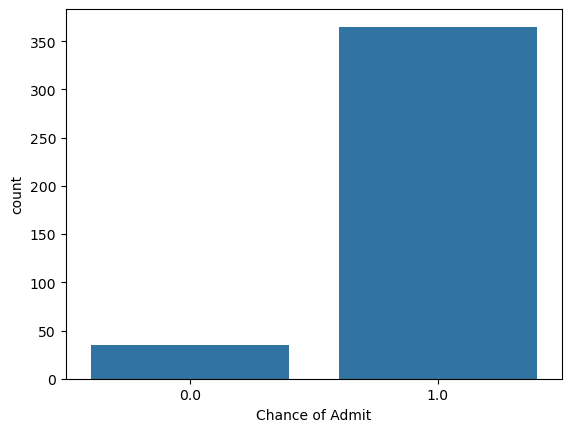

In [5]:
sns.countplot(x=df['Chance of Admit'])

In [6]:
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
oversample= SMOTE()

In [9]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
sx,yx=oversample.fit_resample(X,y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sx, yx, train_size=0.8, random_state=42, stratify=yx)

<Axes: ylabel='count'>

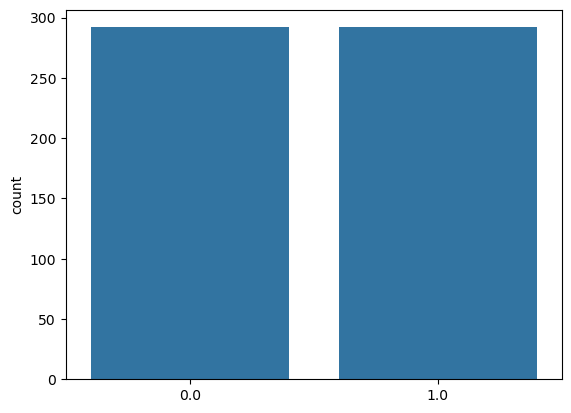

In [12]:
sns.countplot(x=y_train)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
classifier=DecisionTreeClassifier()

In [16]:
classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=classifier.predict(X_test_scaled)

In [33]:
from sklearn.metrics import precision_score,recall_score,fbeta_score,classification_report
print("precision:",precision_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
print("fbeta_score:",fbeta_score(y_test,y_pred,beta=1))

precision: 0.9571428571428572
recall_score: 0.9178082191780822
fbeta_score: 0.9370629370629371


In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
tree=plot_tree(decision_tree=classifier,feature_names=df.columns,filled=True)